# Dataframe Pivot and Visualizer Test

In [1]:
import os
import sys
import pandas as pd 

from utils import query_engines, dataframe_tools

q = query_engines.QueryEngines()

In [2]:
QUERY_NAME = 'test.sql'
START_DATE = "'2025-01-01'"
END_DATE = "'2026-01-01'"

params = {
    'start_date': str(START_DATE),
    'end_date': str(END_DATE)
}

df = q.run_query_starburst(
    QUERY_NAME,
    params=params,
    csv_file=QUERY_NAME,
    load_csv_file=True
)

df.head()

,p_creation_date,order_country_code,order_final_status,n_orders
0,2025-01-01,ES,CanceledStatus,6775
1,2025-01-01,ES,DeliveredStatus,257543
2,2025-01-01,PT,CanceledStatus,1970
3,2025-01-01,PT,DeliveredStatus,52668
4,2025-01-02,ES,CanceledStatus,4552


# Pivot

In [3]:
pivot_params = {
    'df': df,
    'index': [1],
    'columns': [2],
    'values': [4],
    'aggfuncs': ['sum']
}

p = dataframe_tools.Pivot(df, pivot_params).run_pivot()
p

,p_creation_date,sum__n_orders__ES,sum__n_orders__PT
0,2025-01-01,264318,54638
1,2025-01-02,217360,52456
2,2025-01-03,256262,54660
3,2025-01-04,266842,57548
4,2025-01-05,280275,59604
...,...,...,...
73,2025-03-15,303433,55117
74,2025-03-16,335758,51635
75,2025-03-17,178952,39655
76,2025-03-18,182622,39730


# Plotter

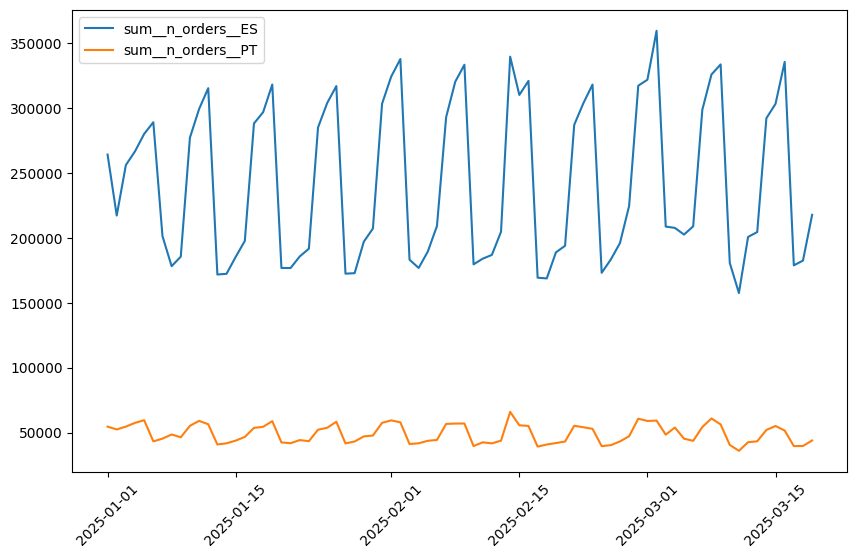

In [4]:
figure_params = {
    'n_plots': 1, 
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': False,
    'share_y': False,
    'x_limits': None, # [(X, X)]
    'y_limits': None, # [(X, X)]
    'log_axis': None, # ['x', 'y', 'both']
    'title': None,
}

plot_params = [
    {
    "plot_type": "lineplot",
    "x_column": [1],  
    "y_columns": [2,3],
    "colors": ['b','o'], # ['o','g','r','pu','br','pi','gr','ol','cy']
    "styles": ['-','-'], # ['--'. '-', ':']
    "legend": True
    },
]


dataframe_tools.Plotter(p, plot_params=plot_params, figure_params=figure_params).run_plotter()

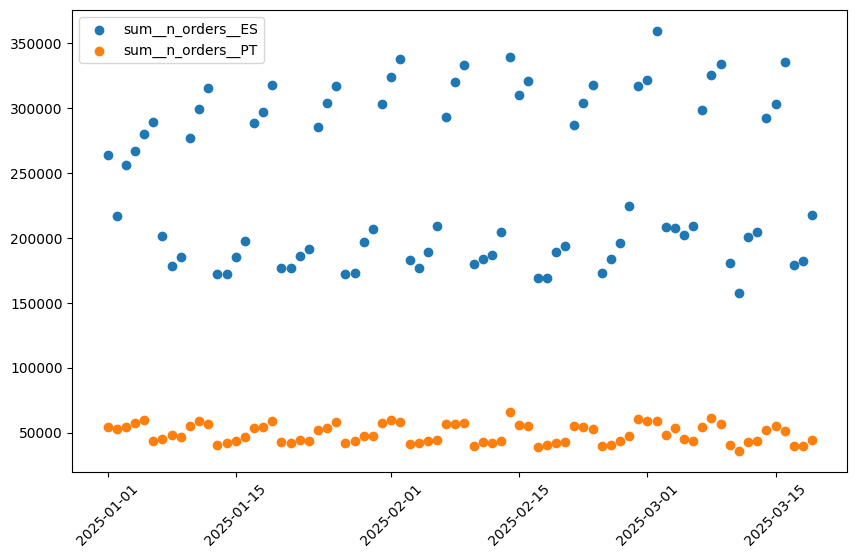

In [5]:
figure_params = {
    'n_plots': 1, 
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': False,
    'share_y': False,
    'x_limits': None, # [(X, X)]
    'y_limits': None, # [(X, X)]
    'log_axis': None, # ['x', 'y', 'both']
    'title': None,
}

plot_params = [
    {
    "plot_type": "scatterplot",
    "x_column": [1],  
    "y_columns": [2,3],
    "colors": ['b','o'], # ['o','g','r','pu','br','pi','gr','ol','cy']
    "legend": True
    },
]


dataframe_tools.Plotter(p, plot_params=plot_params, figure_params=figure_params).run_plotter()

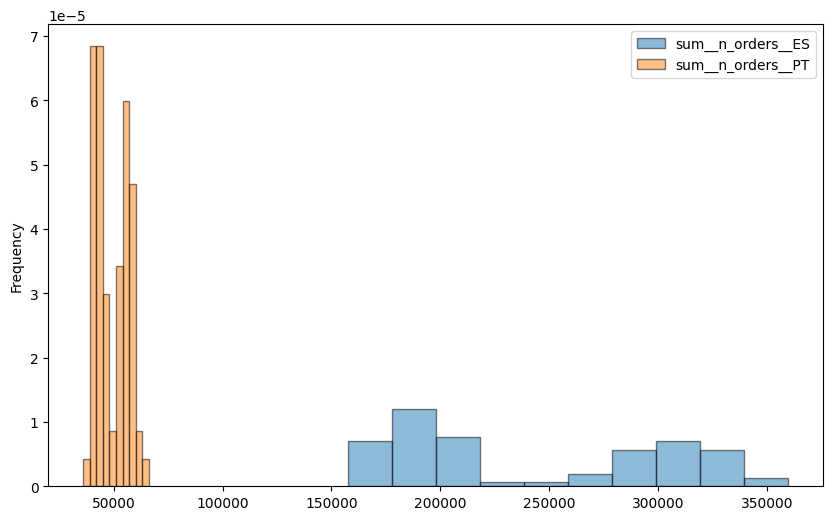

In [8]:
# Histogram
plot_params = [
    {
    "plot_type": "histogram",
    "y_columns": [2,3],
    "colors": ['b','o'], # ['o','g','r','pu','br','pi','gr','ol','cy']
    "legend": True,
    "bins": 10,
    },
]

dataframe_tools.Plotter(p, plot_params=plot_params, figure_params=None).run_plotter()

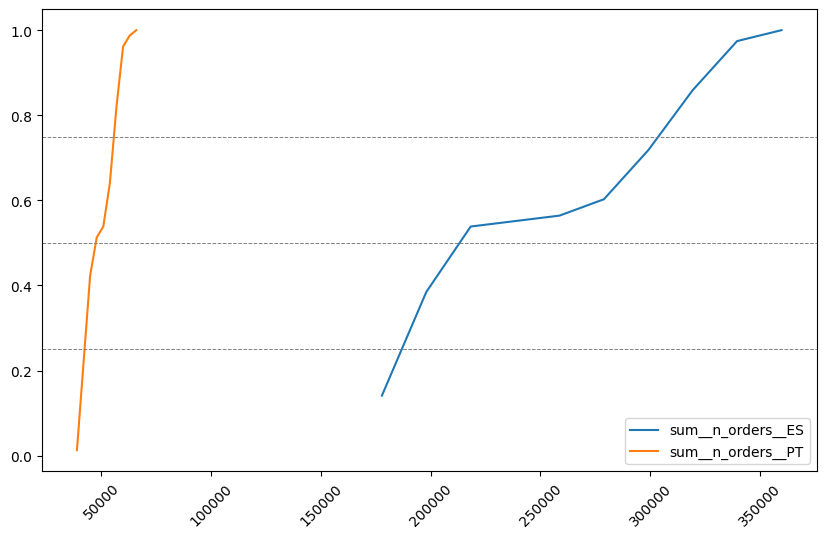

In [9]:
# Histogram
plot_params = [
    {
    "plot_type": "histogram_accumulated",
    "y_columns": [2,3],
    "colors": ['b','o'], # ['o','g','r','pu','br','pi','gr','ol','cy']
    "legend": True,
    "bins": 10,
    },
]

dataframe_tools.Plotter(p, plot_params=plot_params, figure_params=None).run_plotter()